In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

train = pd.read_csv('emnist-letters-train.csv',encoding='utf-8', header=None)
test = pd.read_csv('emnist-letters-test.csv',encoding='utf-8', header=None)

In [2]:
print(train.shape)
print(test.shape)

(88800, 785)
(14800, 785)


In [3]:
train.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Split feature and target
--- 
- train과 test 각각의 feature과 target을 나누기

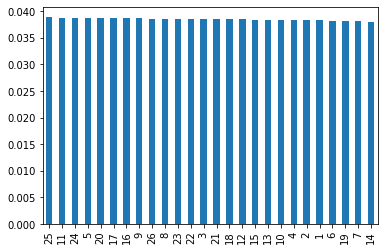

In [3]:
target = train.iloc[:, 0].values.reshape(-1,1)
features = train.iloc[:, 1:]
pd.DataFrame(target)[0].value_counts(normalize=True).sort_values(ascending=False).plot(kind='bar')

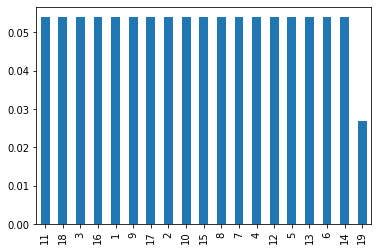

In [6]:
target = test.iloc[:, 0].values.reshape(-1,1)
features = test.iloc[:, 1:]
pd.DataFrame(target)[0].value_counts(normalize=True).sort_values(ascending=False).plot(kind='bar')

In [7]:
X_train = train.drop([0], axis=1) #drop label field (data type : pandas DataFrame)
y_train = train[0] #get label field (data type: pandas series)

In [8]:
X_test = test.drop([0], axis=1) #drop label field (data type : pandas DataFrame)
y_test = test[0] #get label field (data type: pandas series)

In [9]:
# check x, y data

print(type(X_train))
print(type(y_train))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [10]:
#check x data

X_train.head()

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
#check y data

y_train[:5]

0    23
1     7
2    16
3    15
4    23
Name: 0, dtype: int64

In [12]:
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.figure(figsize=(9,9))
plt.show()

<Figure size 648x648 with 0 Axes>

---
- Randomforest

In [22]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=42)
rnd_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [23]:
from sklearn.metrics import accuracy_score

y_pred = rnd_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.867027027027027

---
- Decision Tree

In [18]:
from sklearn import tree

clf_dt = tree.DecisionTreeClassifier(random_state=42)
clf_dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

In [19]:
y_pred_dt = clf_dt.predict(X_test)
accuracy_score(y_test, y_pred_dt)

0.669527027027027

---
- Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression(random_state=42, solver='lbfgs', multi_class='multinomial').fit(X_train,y_train)
y_pred_lg = lg.predict(X_test)
accuracy_score(y_test, y_pred_lg)

C:\Users\LG\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.6997972972972973